In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
x_train.shape, y_train.shape, x_test.shape, x_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
x_train.dtype, y_train.dtype, x_test.dtype, x_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

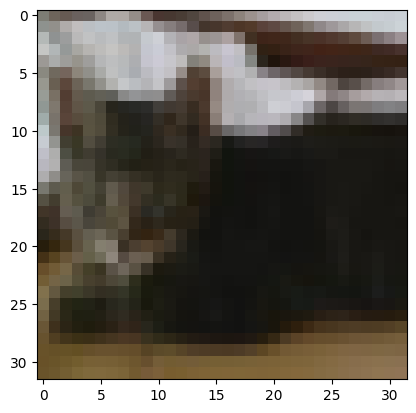

In [7]:
plt.imshow(x_train[9])

In [8]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [9]:
y_test = to_categorical(y_test)

In [10]:
x_train = x_train.astype('float32') / 255.0

In [11]:
x_train.dtype, x_train.min(), x_train.max()

(dtype('float32'), 0.0, 1.0)

In [12]:
x_test = x_test.astype('float32')/255.0

In [13]:
x_test.dtype, x_test.min(), x_test.max()

(dtype('float32'), 0.0, 1.0)

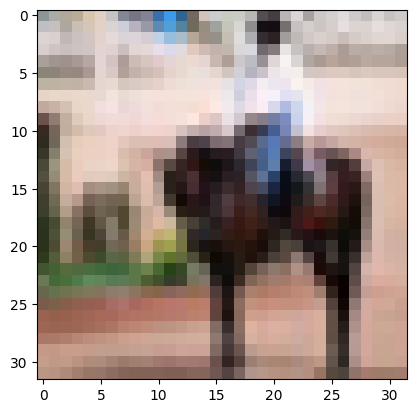

In [14]:
plt.imshow(x_train[11])

In [15]:
n = x_train.shape[0]
i = np.random.permutation(n)
temp = x_train[i]
x_val = temp[0:10000]
x_train = temp[10000:n]

temp = y_train[i]
y_val = temp[0:10000]
y_train = temp[10000:n]

x_train.shape, x_val.shape, y_train.shape, y_val.shape 

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 10), (10000, 10))

In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Dropout, Flatten, GlobalAveragePooling2D, ReLU, BatchNormalization, Activation
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import max_norm



In [50]:
i = Input(shape=(32,32,3), batch_size=None)
x = Conv2D(filters=16, kernel_size=(5,5), activation='relu')(i)
x = Conv2D(filters=16, kernel_size=(5,5), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2,2))(x)

x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2,2))(x)

x = Conv2D(filters=64, kernel_size=(4,4), activation='relu')(x)
x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=(2,2))(x)

# x = Conv2D(filters=128, kernel_size=(3,3), activation='relu')(x)
# # x = Conv2D(filters=128, kernel_size=(3,3), activation='relu')(x)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=(2,2))(x)

x = GlobalAveragePooling2D()(x)

x = Dense(units=128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=64, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=32, activation='relu')(x)
x = Dropout(0.3)(x)
p = Dense(units=10, activation='softmax')(x)

model = Model(i, p)


In [51]:
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_103 (Conv2D)         (None, 28, 28, 16)        1216      
                                                                 
 conv2d_104 (Conv2D)         (None, 24, 24, 16)        6416      
                                                                 
 batch_normalization_54 (Ba  (None, 24, 24, 16)        64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_55 (MaxPooli  (None, 12, 12, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_105 (Conv2D)         (None, 8, 8, 32)          1283

In [54]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=Adam(learnin_rate = 0.0001),loss='categorical_crossentropy',metrics=['accuracy'] )

In [55]:
model.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), epochs=25)

Epoch 1/25
1250/1250 [==============================] - 49s 38ms/step - loss: 1.8974 - accuracy: 0.2919 - val_loss: 1.9908 - val_accuracy: 0.3126
Epoch 2/25
1250/1250 [==============================] - 49s 39ms/step - loss: 1.6011 - accuracy: 0.4238 - val_loss: 1.4547 - val_accuracy: 0.4811
Epoch 3/25
1250/1250 [==============================] - 50s 40ms/step - loss: 1.4700 - accuracy: 0.4798 - val_loss: 1.3369 - val_accuracy: 0.5226
Epoch 4/25
1250/1250 [==============================] - 51s 41ms/step - loss: 1.3727 - accuracy: 0.5224 - val_loss: 1.3826 - val_accuracy: 0.5173
Epoch 5/25
1250/1250 [==============================] - 50s 40ms/step - loss: 1.2943 - accuracy: 0.5565 - val_loss: 1.2930 - val_accuracy: 0.5512
Epoch 6/25
1250/1250 [==============================] - 52s 41ms/step - loss: 1.2379 - accuracy: 0.5791 - val_loss: 1.3460 - val_accuracy: 0.5481
Epoch 7/25
1250/1250 [==============================] - 51s 41ms/step - loss: 1.1874 - accuracy: 0.5943 - val_loss: 1.0776 -

KeyboardInterrupt: 